In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import math

In [2]:
train_url = r"C:\Code\Python\ann\HPGe_Point_Efficiency\train.csv"
train_dataset = np.loadtxt(train_url, delimiter=',')
print(train_dataset.shape)
valid_url = r"C:\Code\Python\\ann\HPGe_Point_Efficiency\valid.csv"
valid_dataset = np.loadtxt(valid_url, delimiter=',')
print(valid_dataset.shape)
test_url = r"C:\Code\Python\ann\HPGe_Point_Efficiency\test.csv"
test_dataset = np.loadtxt(test_url, delimiter=',')
print(test_dataset.shape)
#print(test_dataset[0,0])
#print(test_dataset[0:,2])

(360, 3)
(144, 3)
(135, 3)


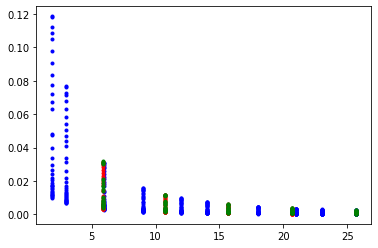

In [3]:
plt.plot(train_dataset[0:,0],train_dataset[0:,2],linewidth=0,marker='o',  markersize=3, markerfacecolor='blue', markeredgecolor='blue')
plt.plot(valid_dataset[0:,0],valid_dataset[0:,2],linewidth=0,marker='o',  markersize=3, markerfacecolor='red', markeredgecolor='red')
plt.plot(test_dataset[0:,0],test_dataset[0:,2],linewidth=0,marker='o',  markersize=3, markerfacecolor='green', markeredgecolor='green')

In [4]:
x_train = train_dataset[:,0:2]
x_train[:,0] = x_train[:,0]/26
x_train[:,1] = x_train[:,1]/2500
y_train = -np.log10(train_dataset[:,2:3])/4
x_valid = valid_dataset[:,0:2]
x_valid[:,0] = x_valid[:,0]/26
x_valid[:,1] = x_valid[:,1]/2500
y_valid = -np.log10(valid_dataset[:,2:3])/4
x_test = test_dataset[:,0:2]
x_test[:,0] = x_test[:,0]/26
x_test[:,1] = x_test[:,1]/2500
y_test = -np.log10(test_dataset[:,2:3])/4
print(x_train.shape)
print(y_train.shape)

(360, 2)
(360, 1)


In [5]:
model = Sequential()
model.add(Dense(10, input_dim=2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [6]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=opt, loss='mean_squared_error')
history = model.fit(x_train, y_train, epochs=100, batch_size=20,validation_data=(x_valid, y_valid))
print('Model weights: ', model.get_weights())
model.save('HPGe_Point_Efficiency.h5')

Epoch 1/100
18/18 [==============================] - 1s 13ms/step - loss: 0.0279 - val_loss: 0.0063
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0074 - val_loss: 0.0023
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.0019
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 10/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 11

18/18 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 84/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 9.8831e-04
Epoch 85/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 86/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 87/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 88/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 89/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 90/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 9.6741e-04
Epoch 91/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 92/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch

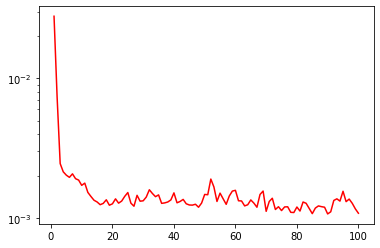

In [7]:
training_loss = history.history['loss']
epoch_count = range(1, len(training_loss) + 1)
plt.yscale("log")
plt.plot(epoch_count, training_loss, 'r-')

3.27116284492269
98.45772602189636


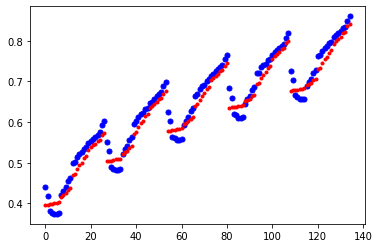

In [8]:
model = tf.keras.models.load_model('HPGe_Point_Efficiency.h5')
y_predict = model.predict(x_test)
error = np.abs((y_predict-y_test)/y_test)
recovery = np.abs(y_predict/y_test)
print(np.average(error)*100)
print(np.average(recovery)*100)
plt.plot(range(y_test.size),y_test,linewidth=0,marker='o',  markersize=5, markerfacecolor='blue', markeredgecolor='blue')
plt.plot(range(y_test.size),y_predict,linewidth=0,marker='o',  markersize=3, markerfacecolor='red', markeredgecolor='red')

0.29168385433057425
1.2179946349757296
0.0025691135098428893
0.0011939202213769493


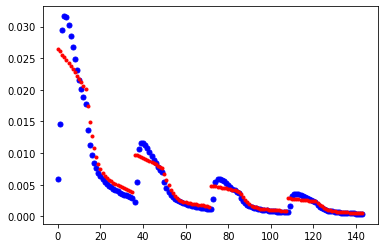

In [9]:
model = tf.keras.models.load_model('HPGe_Point_Efficiency.h5')
y_predict = model.predict(x_valid)

relative_error = np.average(np.abs((np.power(10,-y_predict*4)-np.power(10,-y_valid*4))/np.power(10,-y_valid*4)))
recovery = np.average(np.abs(np.power(10,-y_predict*4)/np.power(10,-y_valid*4)))
rmse = np.power(np.average(np.power(np.power(10,-y_predict*4)-np.power(10,-y_valid*4),2)),0.5)
mae = np.average(np.abs(np.power(10,-y_predict*4)-np.power(10,-y_valid*4)))

print(relative_error)
print(recovery)
print(rmse)
print(mae)

plt.plot(range(y_valid.size),np.power(10,-y_valid*4),linewidth=0,marker='o',  markersize=5, markerfacecolor='blue', markeredgecolor='blue')
plt.plot(range(y_valid.size),np.power(10,-y_predict*4),linewidth=0,marker='o',  markersize=3, markerfacecolor='red', markeredgecolor='red')

In [10]:
for i in range(1,201):
    model = Sequential()
    model.add(Dense(i, input_dim=2, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()

    opt = tf.keras.optimizers.Adam(learning_rate=0.1)
    model.compile(optimizer=opt, loss='mean_squared_error')
    history = model.fit(x_train, y_train, epochs=100, batch_size=20,validation_data=(x_valid, y_valid))
    print('Model weights: ', model.get_weights())
    training_loss = history.history['loss']
    model.save('HPGe_Point_Efficiency_loop.h5')

    model = tf.keras.models.load_model('HPGe_Point_Efficiency_loop.h5')
    y_predict = model.predict(x_valid)
    
    relative_error = np.average(np.abs((np.power(10,-y_predict*4)-np.power(10,-y_valid*4))/np.power(10,-y_valid*4)))
    recovery = np.average(np.abs(np.power(10,-y_predict*4)/np.power(10,-y_valid*4)))
    rmse = np.power(np.average(np.power(np.power(10,-y_predict*4)-np.power(10,-y_valid*4),2)),0.5)
    mae = np.average(np.abs(np.power(10,-y_predict*4)-np.power(10,-y_valid*4)))
    
    f = open("record.txt","a")
    f.write( str(i) + '\t' + str(relative_error) + '\t' +str(recovery) + '\t' + str(rmse) +'\t'+ str(mae) + '\n')
    f.close()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
18/18 [==============================] - 0s 9ms/step - loss: 0.0243 - val_loss: 0.0117
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0161 - val_loss: 0.0059
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0064 - val_loss: 0.0018
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 5/100
18/18 [==============================] - 0s 4ms/

18/18 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0023
Epoch 77/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0016
Epoch 78/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0021
Epoch 79/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0024
Epoch 80/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 81/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 0.0018
Epoch 82/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0028
Epoch 83/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 84/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 85/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0029
Epoch 86/100


ValueError: operands could not be broadcast together with shapes (135,1) (144,1) 